# knn 模型分类———通过一个人的身高、体重预测其性别

## 建立训练数据并进行可视化

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'numpy'

In [ ]:
x_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67],
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

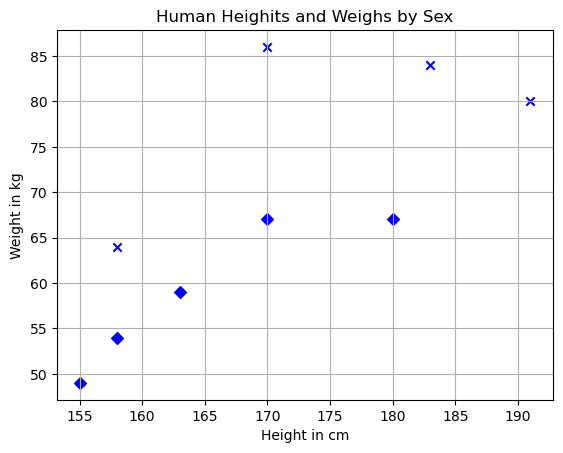

In [ ]:
# 设置标题和坐标轴名称
plt.figure()
plt.title('Human Heighits and Weighs by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(x_train):
    # 使用'x'标记表示训练实例中的男性，使用菱形表示训练实例中的女性
    plt.scatter(x[0], x[1], c='b', marker='x' if y_train[i] == 'male' else 'D')

plt.grid(True)
plt.show()      

## 进行KNN预测

In [ ]:
# 预测对象的建立
x = np.array([155, 70])
distances = np.sqrt(np.sum((x_train - x) ** 2, axis = 1)) # 得到一个一维数组，有九个元素。表示训练数据和测试实例的距离
distances



array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [ ]:
# 找出距离最近的3个训练实例
nearest_neighbor_indices = distances.argsort()[:3]  # k为3, 对所有距离进行排序，并取出前3个最小距离的索引
# np.take() 作用：从输入数组中取出由指定索引标识的元素。
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)  # 使用这些索引从y_train中获取对应的性别标签
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

In [ ]:
# 使用Counter对象统计最近邻居的性别标签
from collections import Counter
b = Counter(nearest_neighbor_genders)  # 创建一个Counter对象，计算最近邻居的性别标签的数量
# most.common() 得到一个一行二列的数组，第一个元素表示数量最多的性别标签，第二个元素表示该标签出现的次数
b.most_common(1)[0][0]   # 使用most_common方法找出数量最多的性别标签，这就是新观察值的预测性别 

'female'

## 用scikit-learn类库实现KNN分类器（上述功能）

In [ ]:
from sklearn.preprocessing import LabelBinarizer # 用于标签的二值化
from sklearn.neighbors import KNeighborsClassifier # KNN算法的实现

In [ ]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train) # 将训练数据的标签二值化，0表示女性，1表示男性
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
K = 3 
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(x_train, y_train_binarized.reshape(-1)) # 将数据改为一维数组的形式（-1表示未指定的值，系统自动计算），并拟合模型

prediction_binarized = clf.predict(np.array([155, 70]).reshape(1,-1))[0]
# 将一维数组改为二维数组（predict需要接受二维数组）；
# 返回一个数组该数组只有以一个样本，即只有一个元素，取数组的第一个元素

predicted_label = lb.inverse_transform(prediction_binarized) # 标签逆二值化
predicted_label


array(['female'], dtype='<U6')

## 对一个测试数据集进行预测，并且对分类器的性能进行评价

### 对一个数据集进行预测

In [ ]:
x_test = np.array([
    [168, 55],
    [190, 96],
    [160, 52],
    [169, 67],
])
y_test = ['male', 'male' , 'female', 'female']
y_test_binarized = lb.transform(y_test) # 0表示女性 ，1表示男性
print('Binarized labels: %s' % y_test_binarized.T[0]) # 打印y_test_binarized的转置
prediction_binarized = clf.predict(x_test)
print('Binarized predictions: %s' % prediction_binarized)
print('predicted labels: %s' % lb.inverse_transform(prediction_binarized)) # 逆转预测的数值标签，打印字符串标签


Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
predicted labels: ['female' 'male' 'female' 'female']


### 计算准确率


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized,prediction_binarized))


Accuracy: 0.75


### 计算精确率

In [ ]:
from sklearn.metrics import precision_score
print('Precision: %s' %precision_score(y_test_binarized, prediction_binarized))

Precision: 1.0


### 计算召回率

In [ ]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, prediction_binarized))


Recall: 0.5


### 用F1得分（或F1度量）来总结精确率和召回率

In [ ]:
# F1得分是精确率和召回率的调和平均值
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized, prediction_binarized))


F1 score: 0.6666666666666666


### 马修斯相关系数（MCC）————衡量二元分类器性能的另一个选择

In [ ]:
# 完美分类器 MCC得分为1
# 随机进行预测的分类器 MCC得分为0
# 完全预测错误的分类器 MCC得分为-1
from sklearn.metrics import matthews_corrcoef
print('Mattews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, prediction_binarized))

Mattews correlation coefficient: 0.5773502691896258


### 函数classification_report———用于生成精确率、召回率和F1得分

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, prediction_binarized, target_names=['male'], labels=[1]))
# 精确度(precision)、召回率(recall)、F1(f1-score)、样本数(support)
# target_names 指定要显示的类别名称
# labels 指定要包含在评估报告中的类别标签 


              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



# KNN模型回归——通过一个人的身高、性别预测其体重

## 载入数据

In [1]:
import numpy as np 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
X_train = np.array([
    [158,1],
    [170,1],
    [183,1],
    [191,1],
    [155,0],
    [163,0],
    [180,0],
    [158,0],
    [170,0]
])  # 0为男性，1为女性
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

x_test = np.array([
    [168,1],
    [180,1],
    [160,1],
    [169,0]
]) 
y_test = [65, 96, 52, 67]


In [20]:
K =3
clf = KNeighborsRegressor(n_neighbors=K)  # 创建实例,确定K
clf.fit(X_train,y_train)
predictions = clf.predict(x_test)
print('Predicted weights: %s' % predictions)  #  预测值
print('Coefficient of determination: %s' % r2_score(y_test, predictions))  # 决定系数R^2
print('Mean absolute error: %s' % mean_absolute_error(y_test, predictions))  # 预测结果 误差绝对值的均值 MAE
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))  # 均方偏差 MSE


Predicted weights: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889


## 特征缩放

特征缩放转换器————StandardScaler类， 确保所有的特征都有单位方差，即标准化数据（均值为0，反差为1）

### 进行标准化前

In [21]:
# 以微米为单位表示身高，身高特征对距离函数的影响会大大增加
from scipy.spatial.distance import euclidean


In [ ]:
X_train = np.array([
    [1700,1],
    [1600,0],
])  # 0为男性，1为女性
x_test = np.array([1640, 1]).reshape(1, -1) 

print(euclidean(X_train[0, :],x_test))
print(euclidean(X_train[1, :],x_test))

Distance to male: 60.0
Distance to female: 40.01249804748511
